In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from xgboost import plot_importance, plot_tree
import xgboost as xgb

from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error as MSE


In [2]:
df=pd.read_csv('/content/FUROSEMIDE.csv')

In [3]:
df.head(2)

,Unnamed: 0,ORDER_DATE,quantity
0,0,2019-07-01,662.0
1,1,2019-07-02,1060.0


In [4]:
# Convert the date column type to datetime
df['ORDER_DATE'] = pd.to_datetime(df['ORDER_DATE'], format='%Y-%m-%d')
df['ORDER_DATE'] = df['ORDER_DATE'].dt.strftime('%Y-%m-%d')

In [5]:
#extract new feature from the date column in order to make this problem as supervised learning
df['ORDER_DATE'] = pd.to_datetime(df['ORDER_DATE'])
df['dayofweek'] = df['ORDER_DATE'].dt.dayofweek#The day of the week with Monday=0, Sunday=6.
df['quarter'] = df['ORDER_DATE'].dt.quarter#The quarter of the date.
df['month'] = df['ORDER_DATE'].dt.month#The month as January=1, December=12.
df['year'] = df['ORDER_DATE'].dt.year#The year of the datetime.
df['dayofyear'] = df['ORDER_DATE'].dt.dayofyear#The ordinal day of the year.
df['dayofmonth'] = df['ORDER_DATE'].dt.day#The day of the datetime.
df['weekofyear'] = df['ORDER_DATE'].dt.weekofyear#The week ordinal of the year

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':


In [6]:
df.head(2)

,Unnamed: 0,ORDER_DATE,quantity,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
0,0,2019-07-01,662.0,0,3,7,2019,182,1,27
1,1,2019-07-02,1060.0,1,3,7,2019,183,2,27


In [7]:
#delete unwanted column
df=df.drop(['Unnamed: 0','ORDER_DATE'],axis=1)

In [8]:
#split the data 2019-2020 for training
df_train=df[df['year']<2021]
X_train=df_train.drop(['quantity'],axis=1)
y_train=df_train['quantity']

In [9]:
#split the data 2021 for test
df_test=df[df['year']>=2021]
X_test=df_test.drop(['quantity'],axis=1)
y_test=df_test['quantity']

In [10]:
#XGBRegressor model
reg = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=1000)
reg.fit(X_train, y_train,verbose=True)  
yhat = reg.predict(X_test)

In [11]:
#Root mean squared error
rmse = np.sqrt(MSE(y_test, yhat))
print("RMSE : % f" %(rmse))

RMSE :  392.446916


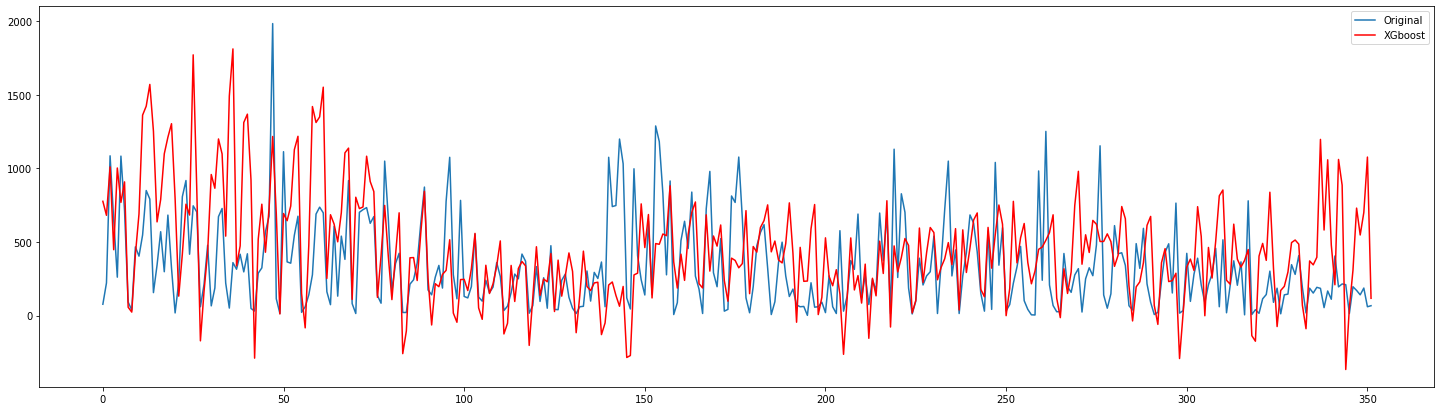

In [12]:
#plot
f = plt.figure()
f.set_figwidth(25)
f.set_figheight(7)
plt.plot(y_test.values, label='Original')
plt.plot(yhat, color='red', label='XGboost')
plt.legend()

In [13]:
params = {
    'min_child_weight': [4, 5],
    'gamma': [i / 10.0 for i in range(3, 6)],
    'subsample': [i / 10.0 for i in range(6, 11)],
    'colsample_bytree': [i / 10.0 for i in range(6, 11)],
    'max_depth': [2, 3, 4]
}
# Initialize XGB and GridSearch
xgb_reg = xgb.XGBRegressor(nthread=-1, objective='reg:squarederror')
grid = GridSearchCV(xgb_reg, params)
grid.fit(X_train, y_train)
gridcv_xgb = grid.best_estimator_
print(r2_score(y_test, gridcv_xgb.predict(X_test)))

-0.15375877271660765


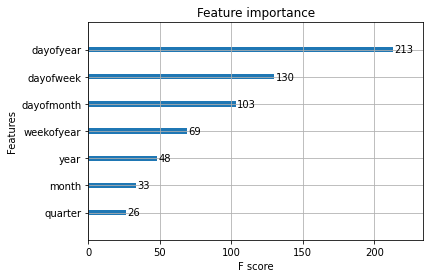

In [23]:
plot_importance(gridcv_xgb)
f.set_figwidth(10)
f.set_figheight(5)

In [15]:
gridcv_xgb

XGBRegressor(colsample_bytree=0.6, gamma=0.3, min_child_weight=4, nthread=-1,
             objective='reg:squarederror', subsample=1.0)

In [16]:
#Root mean squared error
rmse = np.sqrt(MSE(y_test, yhat))
print("RMSE : % f" %(rmse))

RMSE :  392.446916


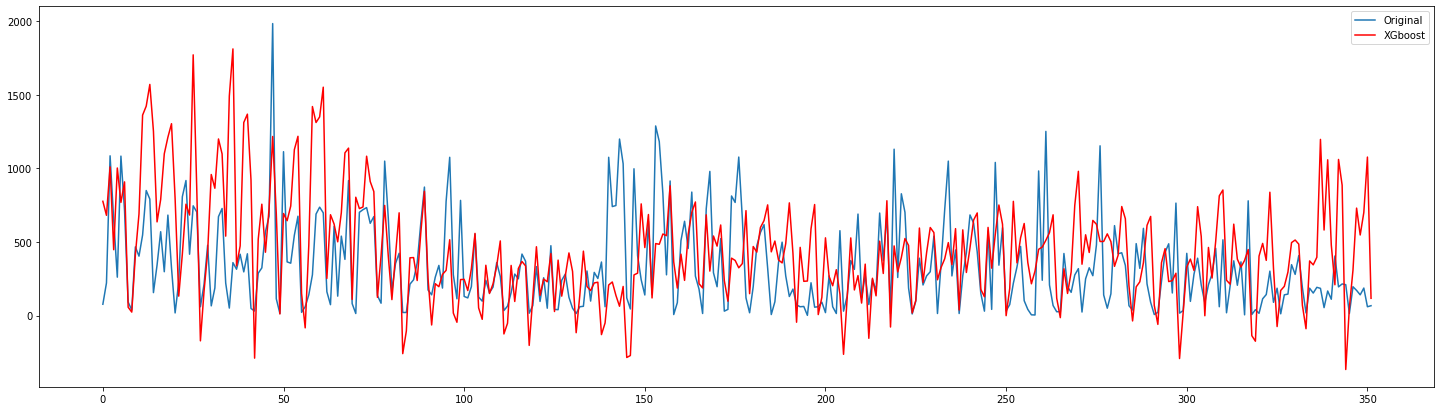

In [17]:
#plot
f = plt.figure()
f.set_figwidth(25)
f.set_figheight(7)
plt.plot(y_test.values, label='Original')
plt.plot(yhat, color='red', label='XGboost')
plt.legend()